BloomTech Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

## Assignment

Complete these tasks for your assignment/project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict? **is_cancerous**
- [x] Is your problem regression or classification? **classification**
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced? **two classes**
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy? **accuracy, precision, and recall**
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them? **impute outliers with 1.5 * IQR**
    - Will you do a random split or a time-based split? **random split**
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. Review requirements for your portfolio project on Canvas, and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [3]:
!ls

2025-08-08_2143_submission.csv	model_8043		 sample_submission.csv
2025-08-11_1658_submission.csv	model_rf_rs_80		 test_features.csv
dt_new_submission.csv		new_submission.csv	 train_features.csv
kaggle.json			rf_water_submission.csv  train_labels.csv


In [4]:
import kagglehub

# Download latest version
DATA_PATH = kagglehub.dataset_download("wasiqaliyasir/breast-cancer-dataset")

print("Path to dataset files:", DATA_PATH)

Path to dataset files: /kaggle/input/breast-cancer-dataset


In [5]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [6]:
plot_confusion_matrix = ConfusionMatrixDisplay.from_estimator
plot_roc_curve = RocCurveDisplay.from_estimator

# **Define ML problem**

Train classification models to predict tumor malignancy

In [65]:
df = pd.read_csv(DATA_PATH + '/Breast_cancer_dataset.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [66]:
df.shape

(569, 33)

In [67]:
df['diagnosis'].value_counts(normalize=True)

,proportion
diagnosis,
B,0.627417
M,0.372583


In [68]:
df['id'].duplicated().sum()

np.int64(0)

In [69]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Wrangle Data**

In [71]:
def wrangle(filepath):

  # import
  df = pd.read_csv(filepath, index_col='id')

  # binary classification
  df['is_cancerous'] = np.where(df['diagnosis']=='B', 0, 1)
  df.drop(columns='diagnosis', inplace=True)

  # drop columns with high number of NaN values
  df.drop(columns='Unnamed: 32', inplace=True)

  return df

In [72]:
df = wrangle(DATA_PATH + '/Breast_cancer_dataset.csv')
df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,is_cancerous
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1
844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1


In [73]:
# all data is numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se           

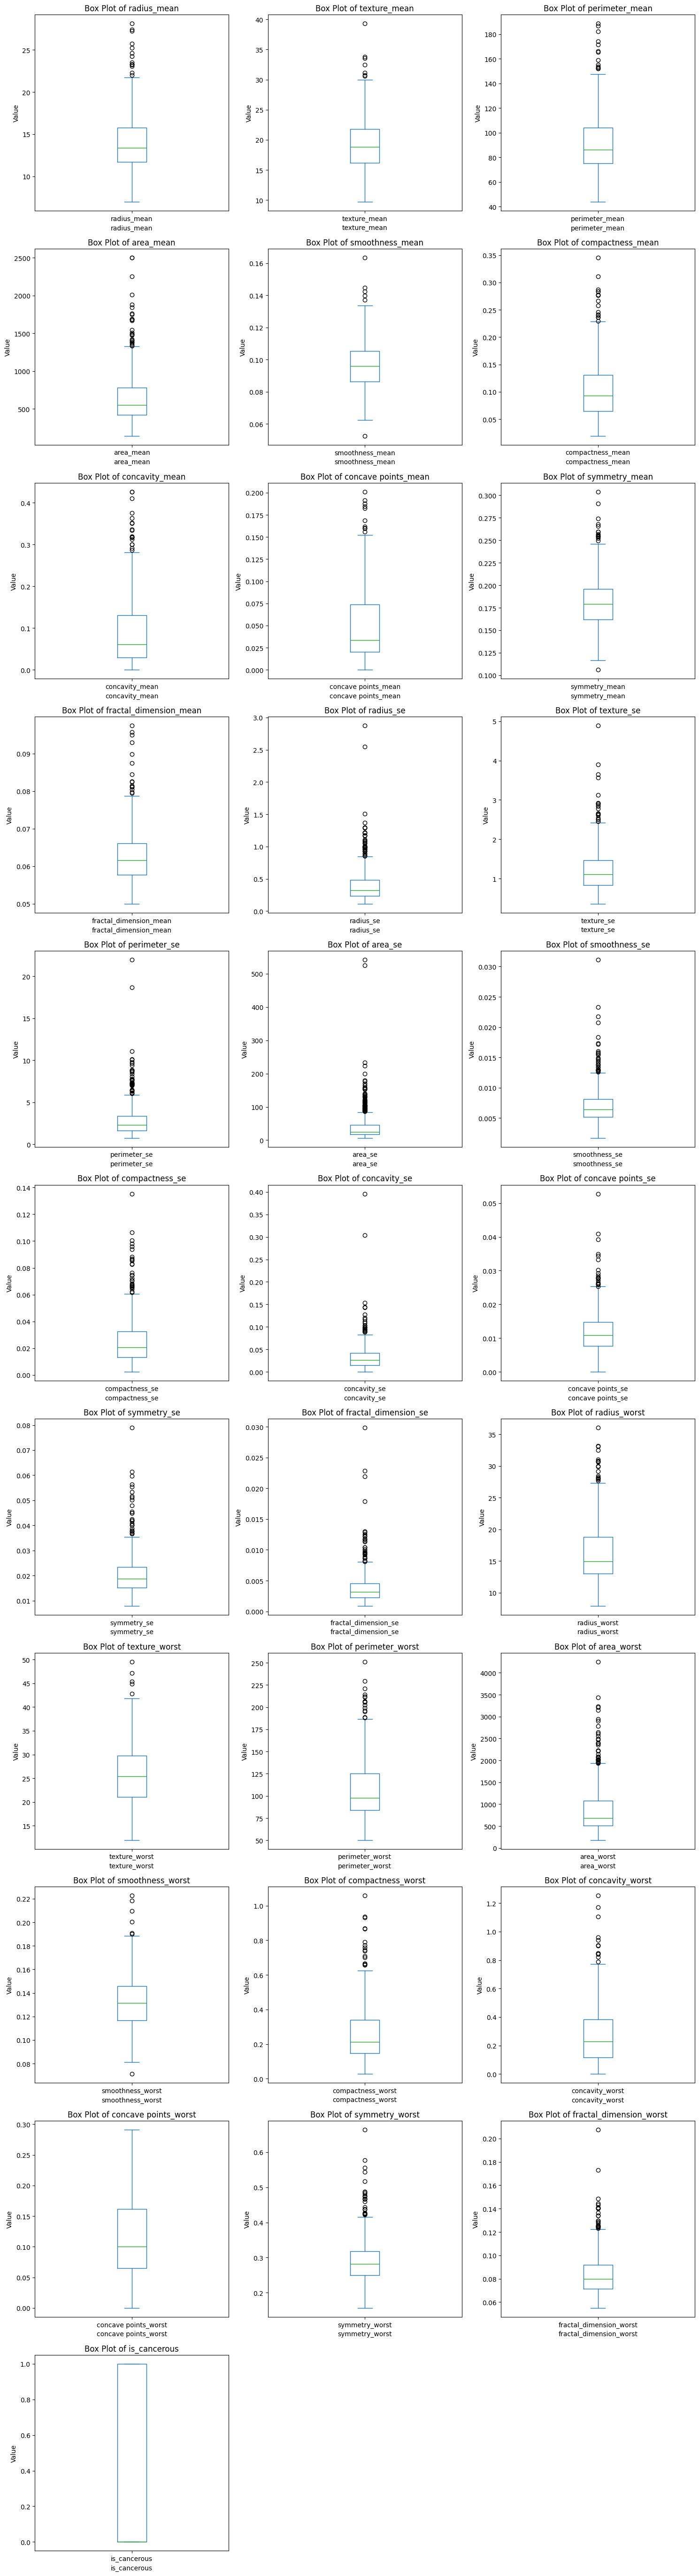

In [74]:
# box-plots of all numerical columns of the DataFrame: df
# plt.subplot(nrows, ncols, plot_number)
# plotting subplots on a grid of 2 rows x 3 columns

numerical_cols = df.select_dtypes(include='number').columns

n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(n_rows, 3, i)
  df[col].plot(kind='box', vert=True)
  plt.title(f'Box Plot of {col}')
  plt.ylabel('Value')
  plt.xlabel(col)

plt.tight_layout()
plt.show()

In [75]:
# finding the upper and lower limit of all columns except points_worst and is_cancerous

num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst']

def find_outlier_limits(col_name):
  Q1, Q3 = df[col_name].quantile([.25, .75])
  IQR = Q3 - Q1
  low = Q1 - (1.5 * IQR)
  high = Q3 + (1.5 * IQR)
  return (high, low)

# dictionary to store outlier limits
outlier_limits = {}

# calculate outlier limits for each column
for col in num_cols:
  outlier_limits[col] = find_outlier_limits(col) # store tuple (high, low)
  high, low = outlier_limits[col]
  print(f'{col}: upper limit: {high:.2f}, lower limit: {low:.2f}')

radius_mean: upper limit: 21.90, lower limit: 5.58
texture_mean: upper limit: 30.24, lower limit: 7.73
perimeter_mean: upper limit: 147.49, lower limit: 31.78
area_mean: upper limit: 1326.30, lower limit: -123.30
smoothness_mean: upper limit: 0.13, lower limit: 0.06
compactness_mean: upper limit: 0.23, lower limit: -0.03
concavity_mean: upper limit: 0.28, lower limit: -0.12
concave points_mean: upper limit: 0.15, lower limit: -0.06
symmetry_mean: upper limit: 0.25, lower limit: 0.11
fractal_dimension_mean: upper limit: 0.08, lower limit: 0.05
radius_se: upper limit: 0.85, lower limit: -0.14
texture_se: upper limit: 2.43, lower limit: -0.13
perimeter_se: upper limit: 5.98, lower limit: -1.02
area_se: upper limit: 86.20, lower limit: -23.16
smoothness_se: upper limit: 0.01, lower limit: 0.00
compactness_se: upper limit: 0.06, lower limit: -0.02
concavity_se: upper limit: 0.08, lower limit: -0.03
concave points_se: upper limit: 0.03, lower limit: -0.00
symmetry_se: upper limit: 0.04, lowe

In [76]:
# replacing outlier values with respective upper and lower limits

for col in num_cols:
  high, low = outlier_limits[col]
  df.loc[df[col] > high, col] = high
  df.loc[df[col] < low, col] = low

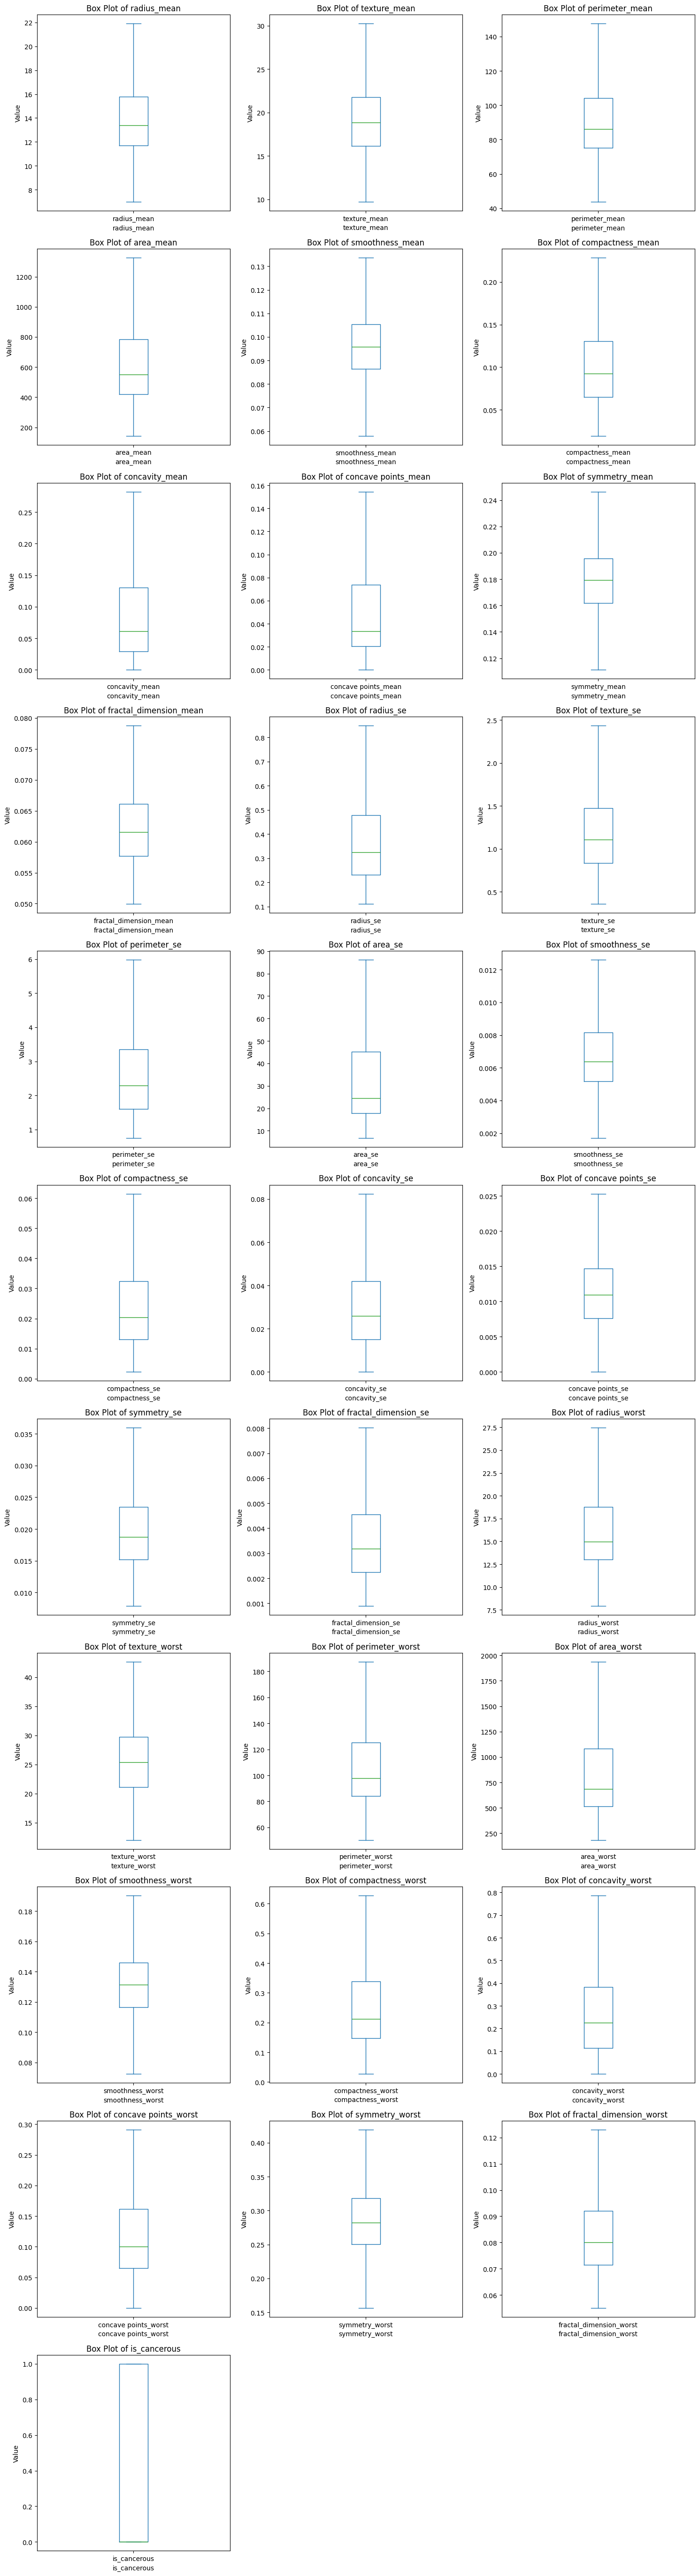

In [77]:
# box-plots of all numerical columns of the DataFrame: df
# plt.subplot(nrows, ncols, plot_number)
# plotting subplots on a grid of 2 rows x 3 columns

numerical_cols = df.select_dtypes(include='number').columns

n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(n_rows, 3, i)
  df[col].plot(kind='box', vert=True)
  plt.title(f'Box Plot of {col}')
  plt.ylabel('Value')
  plt.xlabel(col)

plt.tight_layout()
plt.show()

# Split Data

In [78]:
# classification because we have discrete values to work with
# split DataFrame df into a feature matrix X and the target vector y. We want to predict 'is_cancerous'
target = 'is_cancerous'
y = df[target]
X = df.drop(target, axis=1)

<Axes: xlabel='is_cancerous'>

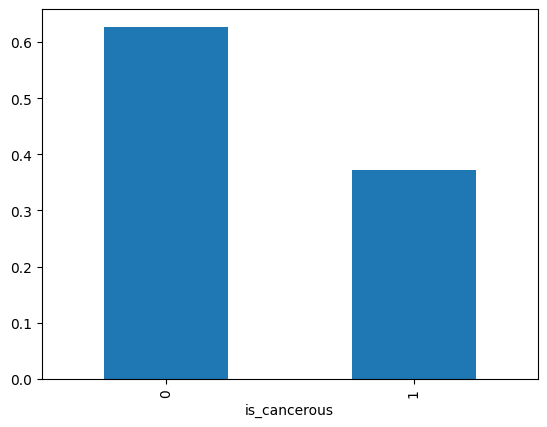

In [79]:
# check if target is balanced or not
y.value_counts(normalize=True).plot(kind='bar')

In [80]:
# using a randomized split, divide X and y into a training set (X_train, y_train) and a validation set (X_val, y_val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((455, 30), (114, 30), (455,), (114,))

# Establish Baseline

Since this is a classification problem, we should establish a baseline accuracy score.

In [82]:
# percentage of our training observations 'B' represents
y_train.value_counts(normalize=True)

,proportion
is_cancerous,
0,0.628571
1,0.371429


In [83]:
baselineacc = y_train.value_counts(normalize=True).max()
print('Baseline accuracy:', baselineacc)

Baseline accuracy: 0.6285714285714286


Majority class is 'Benign' (B).

# Build Model

In [84]:
# Model 1; Logistic Regression
# data set has entirely numeric data so no need for an encoder

model_lr = make_pipeline(
    SimpleImputer(),
    StandardScaler(), # scaling helps ensure models isn't biased to columns with large values (only linear models)
    LogisticRegression()
)

model_lr.fit(X_train, y_train);

In [85]:
# Model 2: Random Forest

model_rf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1)
)

model_rf.fit(X_train, y_train);

# Check Metrics

In [86]:
# accuracy: (correct predictions / total predictions) which is the % of predictions the model got right. Could mislead us because of imbalanced data.
# (tp + tn) / (tp + fp + tn + fn)

print('Training Accuracy (LOGR):', model_lr.score(X_train, y_train))
print('Validation Accuracy (LOGR):', model_lr.score(X_val, y_val))

Training Accuracy (LOGR): 0.9868131868131869
Validation Accuracy (LOGR): 0.9824561403508771


In [87]:
print('Training Accuracy (RF):', model_rf.score(X_train, y_train))
print('Training Accuracy (RF):', model_rf.score(X_val, y_val))

Training Accuracy (RF): 1.0
Training Accuracy (RF): 0.9649122807017544


**Precision, Recall, F1**

Precision = tp / (tp + fp)

(how accurate were you on reducing false positives)

Recall = tp / (tp + fn)

(how accurate were you on reducing false negatives)

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



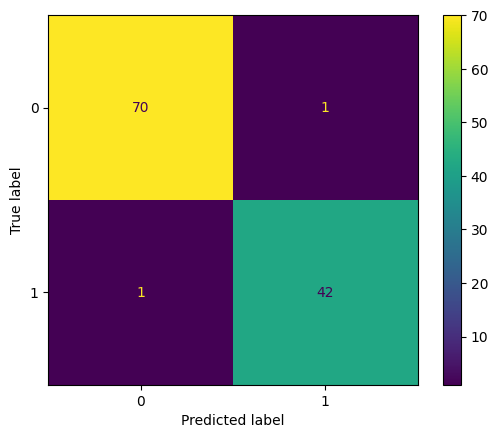

In [88]:
print('Logistic Regression')
print(classification_report(y_val, model_lr.predict(X_val)))
plot_confusion_matrix(model_lr, X_val, y_val)

Random Forest
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



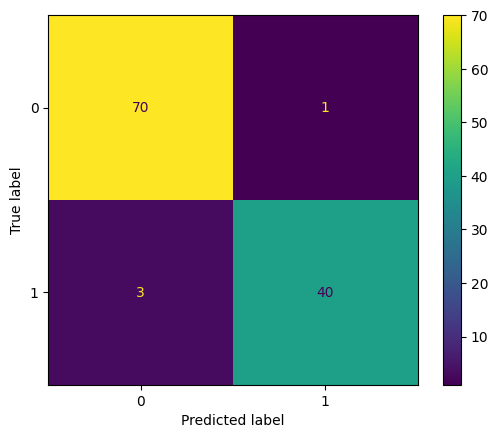

In [89]:
print('Random Forest')
print(classification_report(y_val, model_rf.predict(X_val)))
plot_confusion_matrix(model_rf, X_val, y_val)

# ROC curve

Receiver operating characteristic curve -- evaluating binary classification

Takes prediction probabilities as input. Another name for recall is sensitivity.

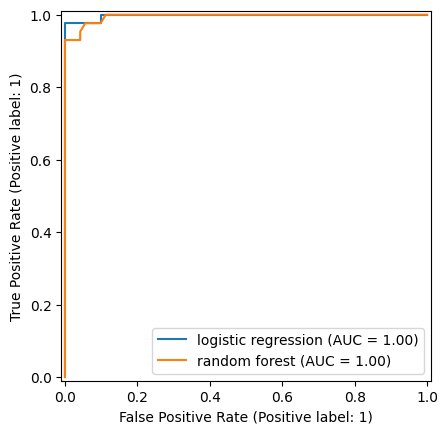

In [90]:
lr = plot_roc_curve(
    model_lr,
    X_val,
    y_val,
    name='logistic regression'
)

rf = plot_roc_curve(
    model_rf,
    X_val,
    y_val,
    ax=lr.ax_,
    name='random forest'
)

In [91]:
roc_auc_score(y_val, model_rf.predict_proba(X_val)[:,-1]) # want the prob of the positive class

np.float64(0.9954143465443825)

In [92]:
roc_auc_score(y_val, model_lr.predict_proba(X_val)[:,-1]) # want the prob of the positive class

np.float64(0.9977071732721913)

In [93]:
# get predicted probabilities from model
y_pred_prob = model_rf.predict_proba(X_val)[:,-1]

# input true labels and prob predictions
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# put data into dictionary
data = {'false_pos_rate': fpr,
        'true_pos_rate': tpr,
        'thresholds': thresholds}

pd.DataFrame(data)

,false_pos_rate,true_pos_rate,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.395349,1.00
2,0.000000,0.674419,0.99
3,0.000000,0.813953,0.91
4,0.000000,0.930233,0.71
5,0.042254,0.930233,0.38
6,0.042254,0.953488,0.31
7,0.056338,0.976744,0.30
8,0.098592,0.976744,0.22
9,0.112676,1.000000,0.19


# Demonstrating how changing the threshold (from roc-auc curve) changes the metrics

In [94]:
y_pred_prob[y_pred_prob >= 0.71] = 1
y_pred_prob[y_pred_prob < 0.71] = 0

In [95]:
print('Validation Accuracy (RF):', accuracy_score(y_val, y_pred_prob))

Validation Accuracy (RF): 0.9736842105263158


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



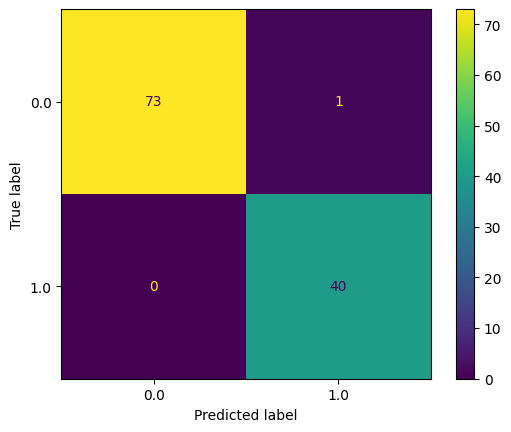

In [96]:
print(classification_report(y_val, model_rf.predict(X_val)))
plot_confusion_matrix(model_rf, X_val, y_pred_prob)